In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
def transform_data(set_of_data):
    features = ['id']
    set_of_data['Gender'] = set_of_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    features.append('Gender')
    
    set_of_data['family_history_with_overweight'] = set_of_data['family_history_with_overweight'].apply(lambda x: 1 if x == 'yes' else 0)
    features.append('family_history_with_overweight')
    
    set_of_data['FAVC'] = set_of_data['FAVC'].apply(lambda x: 1 if x == 'yes' else 0)
    features.append('FAVC')

    set_of_data['SMOKE'] = set_of_data['SMOKE'].apply(lambda x: 1 if x == 'yes' else 0)
    features.append('SMOKE')

    set_of_data['SCC'] = set_of_data['SCC'].apply(lambda x: 1 if x == 'yes' else 0)
    features.append('SCC')

    for label in set_of_data['MTRANS'].unique():
        set_of_data['MTRANS_'+label] = set_of_data['MTRANS'].apply(lambda x: 1 if x == label else 0)
        features.append('MTRANS_'+label)
        
    for label in set_of_data['CAEC'].unique():
        set_of_data['CAEC_'+label] = set_of_data['CAEC'].apply(lambda x: 1 if x == label else 0)
        features.append('CAEC_'+label)
        
    for label in set_of_data['CALC'].unique():
        set_of_data['CALC_'+label] = set_of_data['CALC'].apply(lambda x: 1 if x == label else 0)
        features.append('CALC_'+label) 
        
    # Normalize real values with normalized_df=(df-df.mean())/df.std()
    #set_of_data['Age'] = (set_of_data['Age']-set_of_data['Age'].mean()) / set_of_data['Age'].std()
    features.append('Age')
    
    #set_of_data['Height'] = (set_of_data['Height']-set_of_data['Height'].mean()) / set_of_data['Height'].std()
    features.append('Height')
    
    #set_of_data['Weight'] = (set_of_data['Weight']-set_of_data['Weight'].mean()) / set_of_data['Weight'].std()
    features.append('Weight')
    
    #set_of_data['FCVC'] = (set_of_data['FCVC']-set_of_data['FCVC'].mean()) / set_of_data['FCVC'].std()
    features.append('FCVC')
    
    #set_of_data['NCP'] = (set_of_data['NCP']-set_of_data['NCP'].mean()) / set_of_data['NCP'].std()
    features.append('NCP')
    
    #set_of_data['CH2O'] = (set_of_data['CH2O']-set_of_data['CH2O'].mean()) / set_of_data['CH2O'].std()
    features.append('CH2O')
    
    #set_of_data['TUE'] = (set_of_data['TUE']-set_of_data['TUE'].mean()) / set_of_data['TUE'].std()
    features.append('TUE')
    
    #set_of_data['FAF'] = (set_of_data['FAF']-set_of_data['FAF'].mean()) / set_of_data['FAF'].std()
    features.append('FAF')
    
    return features

In [4]:
features = transform_data(train_data)
_ = transform_data(test_data)
X_predict = test_data[features]
X = train_data[features]
y = train_data['NObeyesdad']
categories = [
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
    'Obesity_Type_III'
]
y = y.apply(lambda x: categories.index(x))
#X.head(10)
#y.head()

## Inspect the data
Checking visual representation of data versus true values of categories (y).

### Background
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40


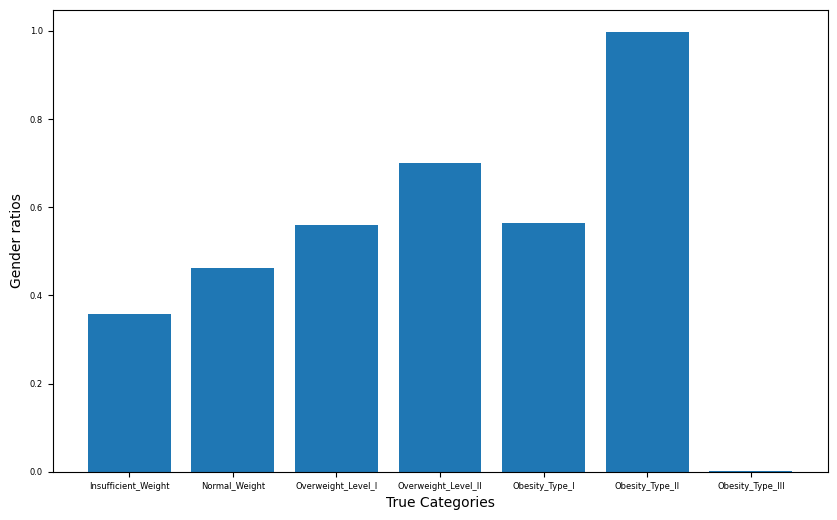

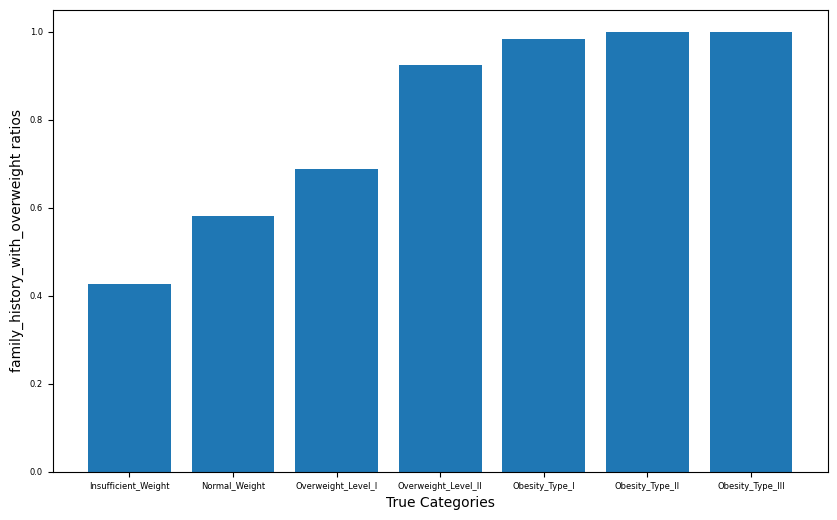

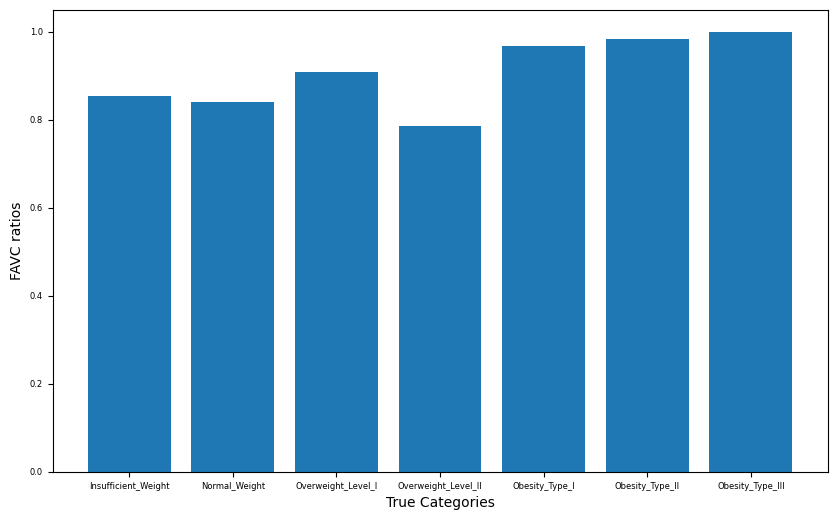

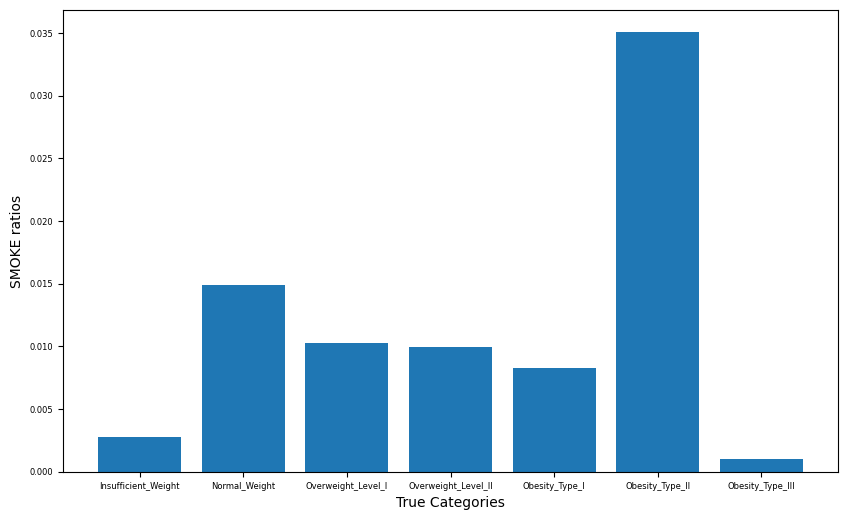

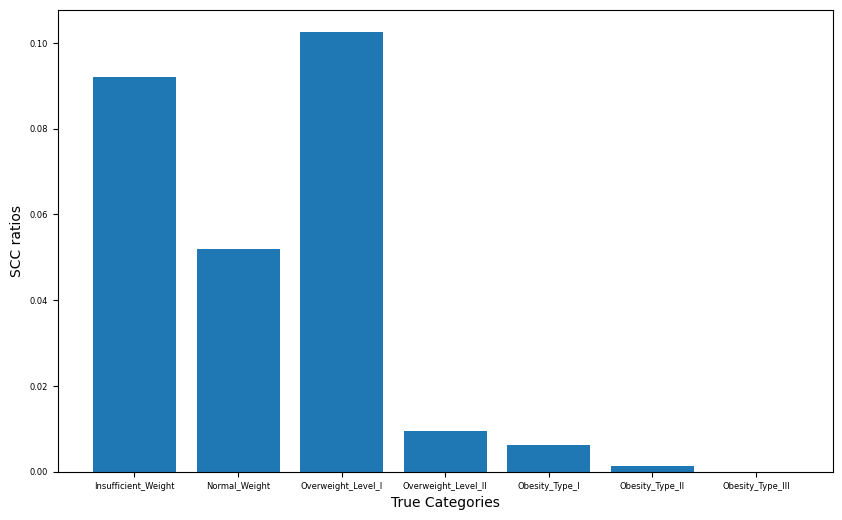

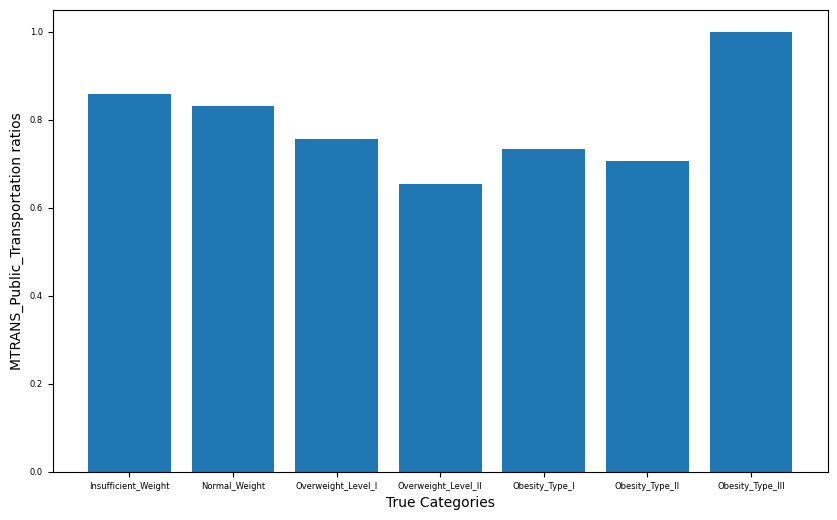

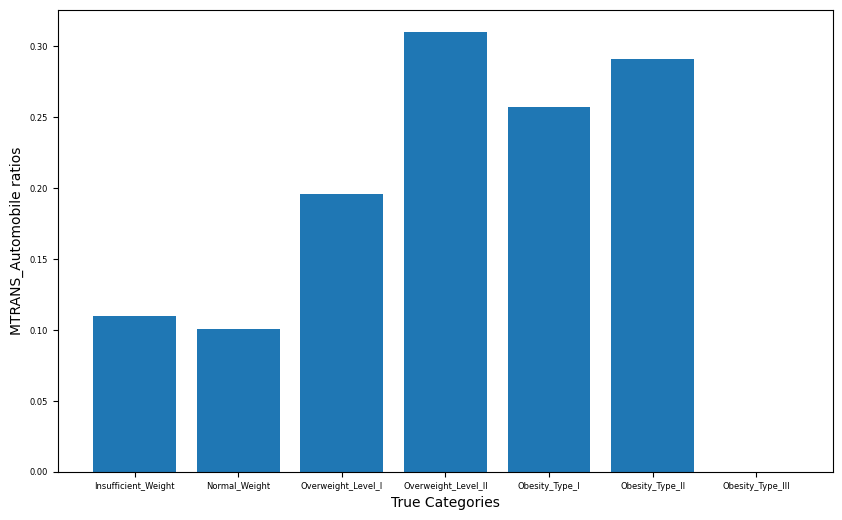

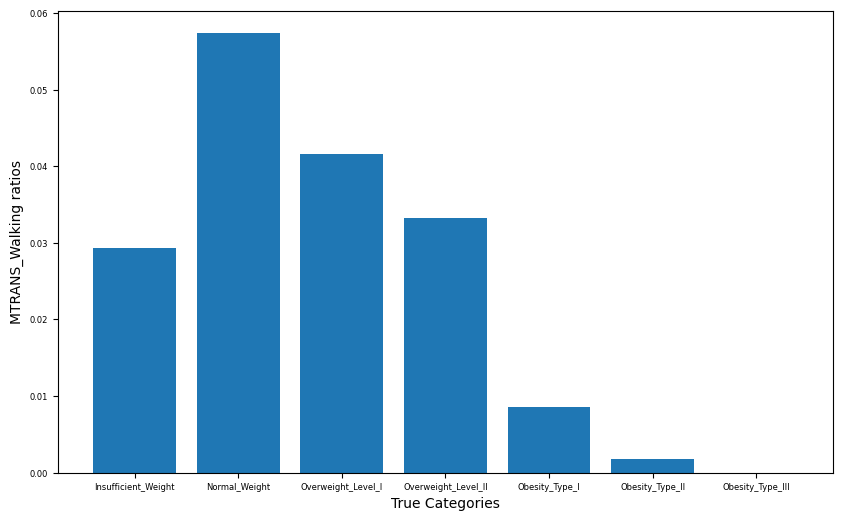

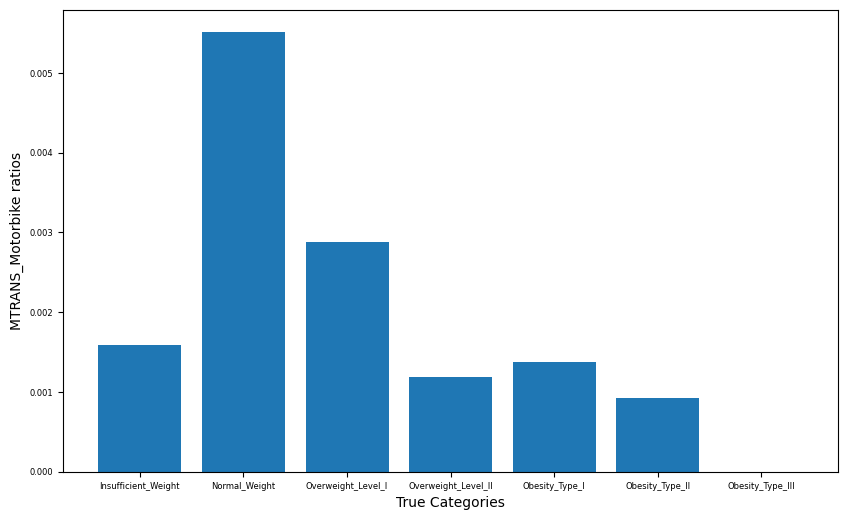

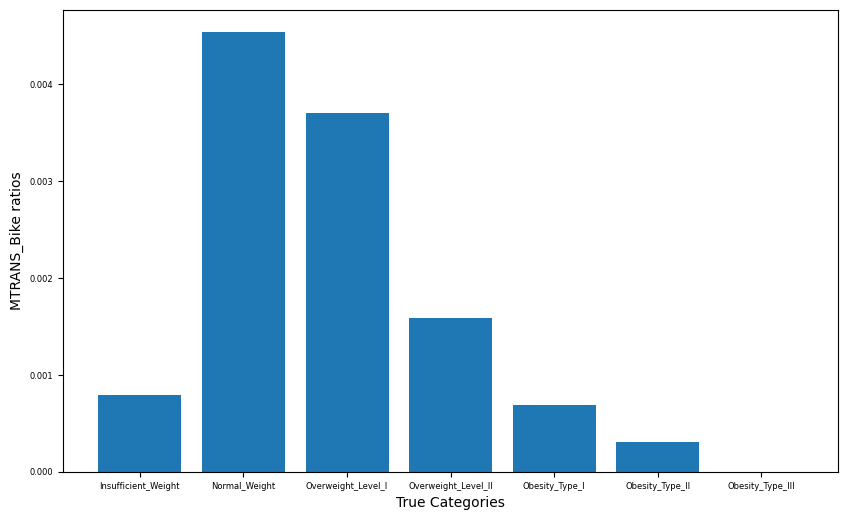

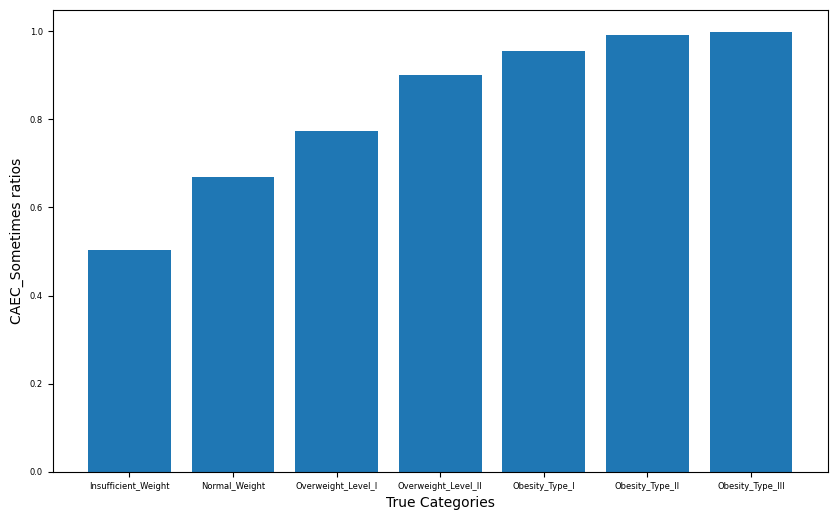

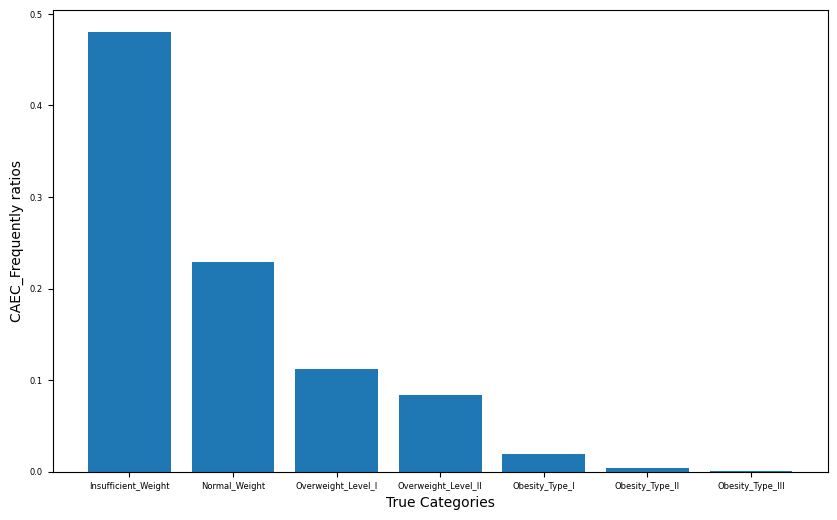

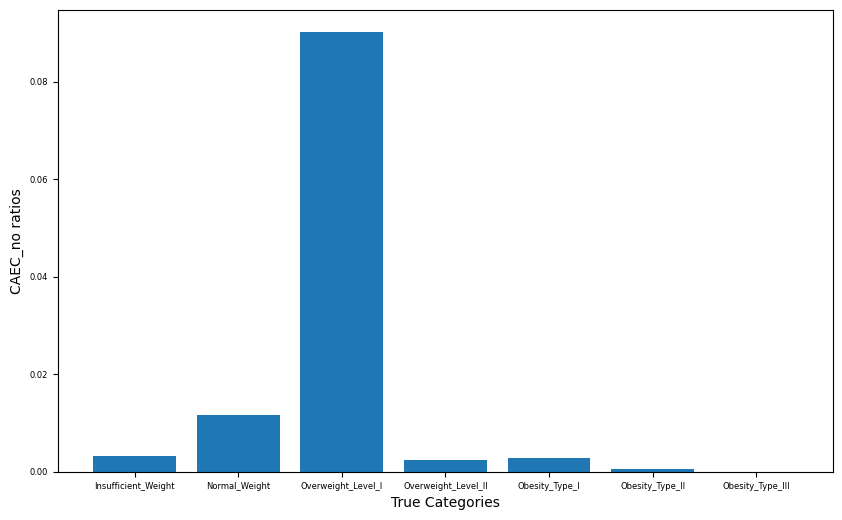

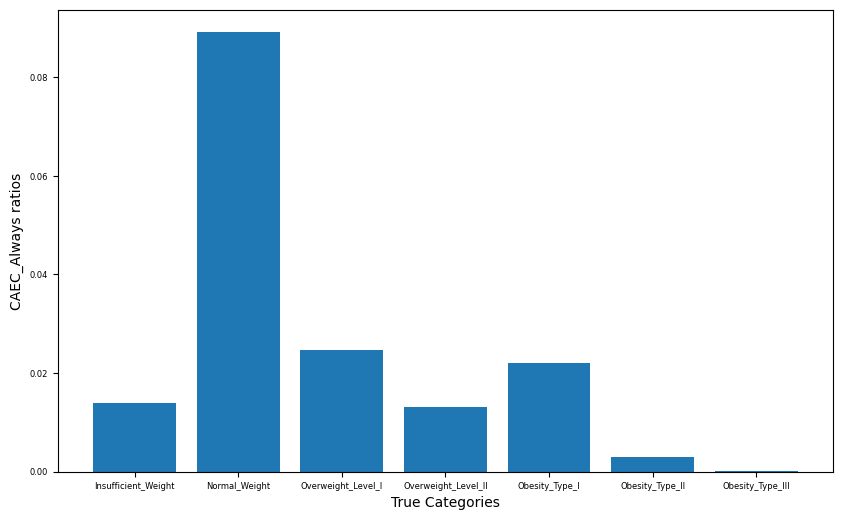

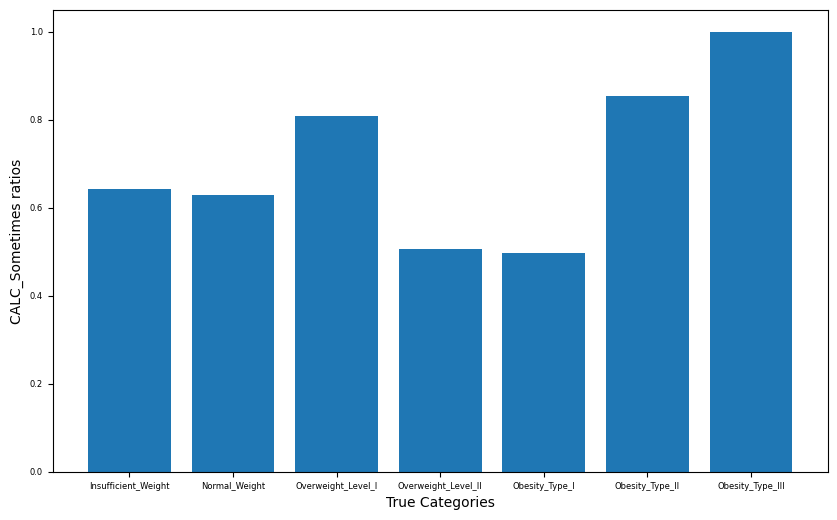

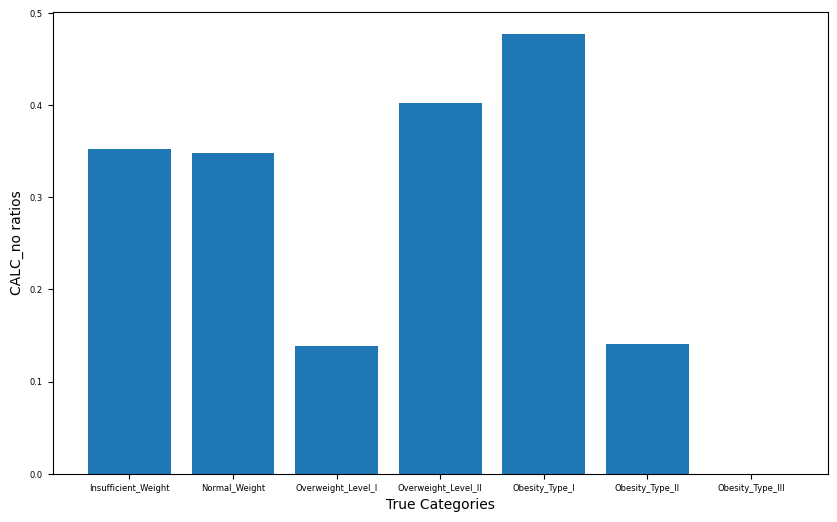

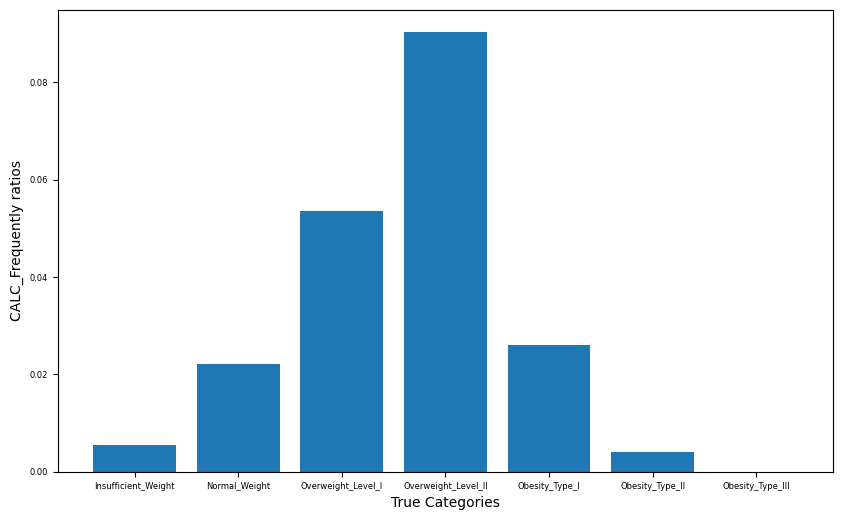

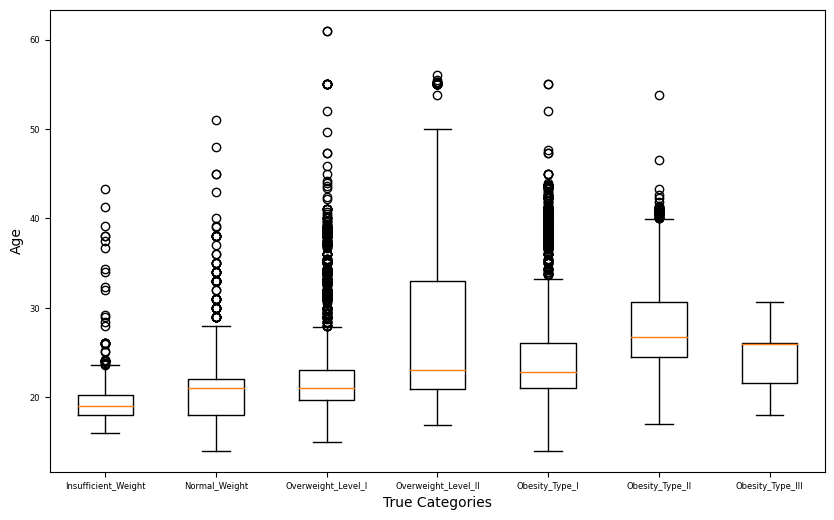

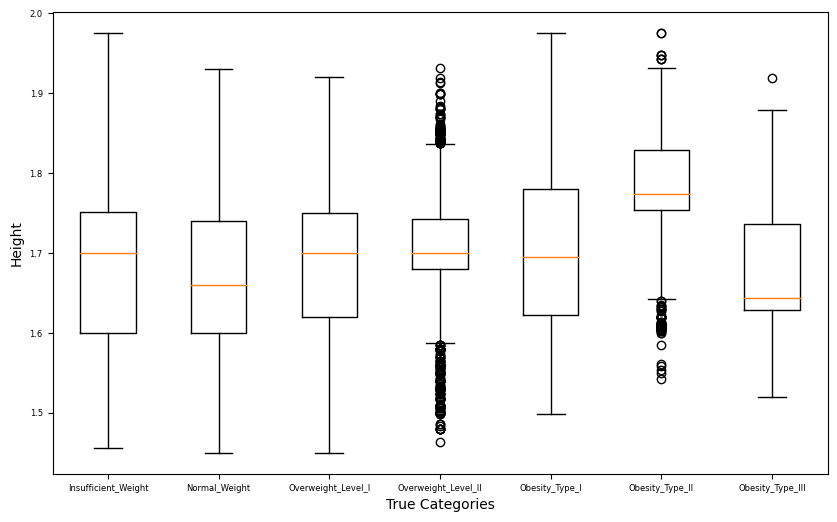

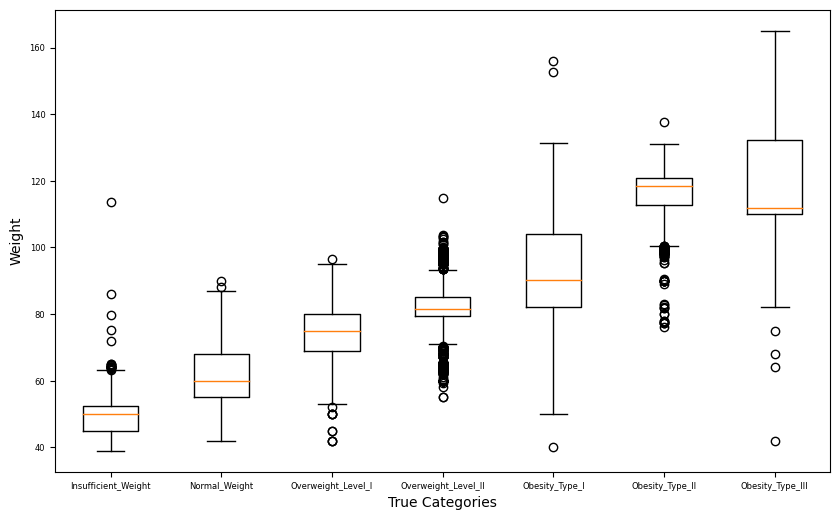

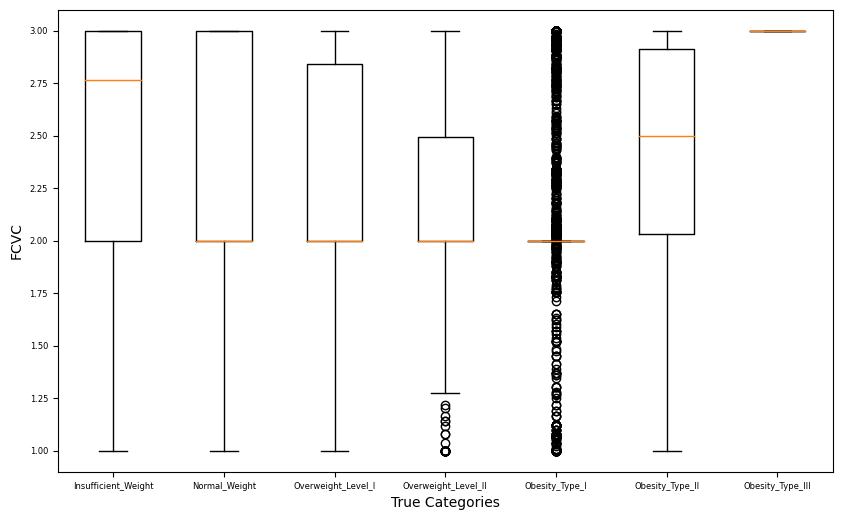

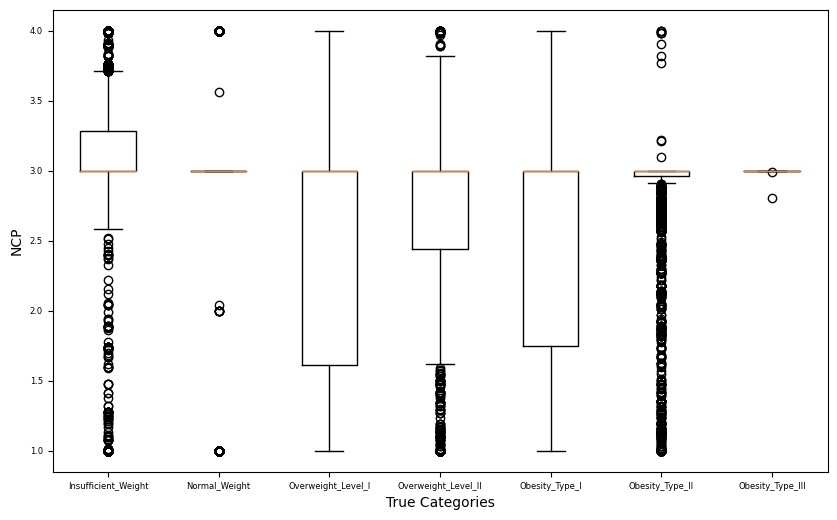

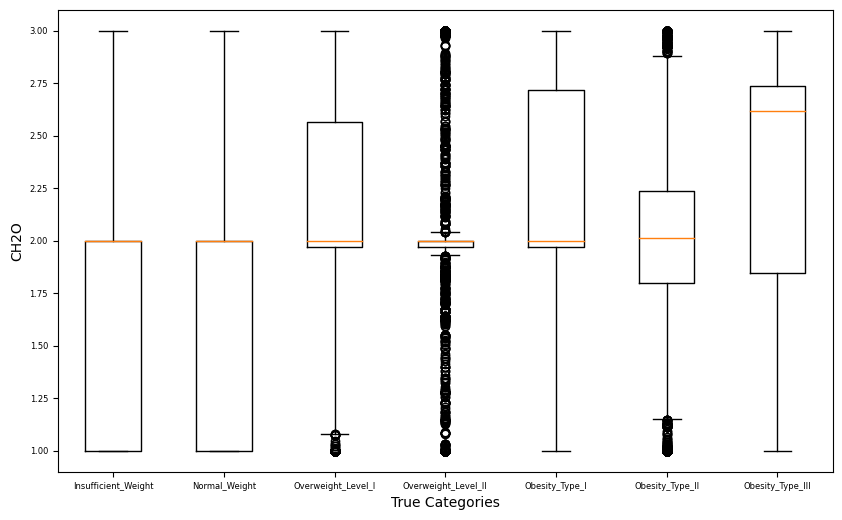

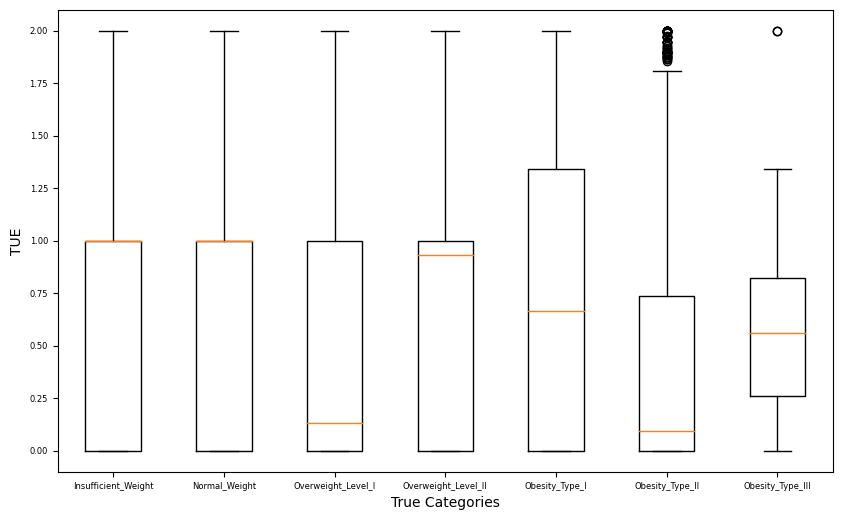

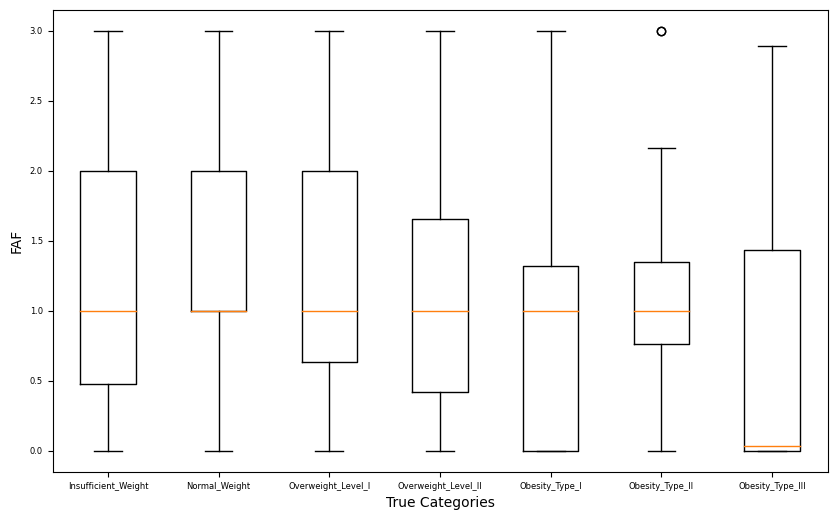

In [5]:
import matplotlib.pyplot as plt

def prep_box_plot(x_values, f):
    # Prepare data for boxplots
    boxplot_data = {cat : [] for cat in categories}
    for i,j in enumerate(y):
        boxplot_data[categories[j]].append(x_values[i])

    # Convert the dictionary to a list of lists
    boxplot_data_list = [boxplot_data[cat] for cat in categories]
    # Plot boxplots for each category
    plt.boxplot(boxplot_data_list, labels=categories)
    plt.ylabel(f)
    
def plot_it():
    plt.tick_params(axis='x', labelsize=6)
    plt.tick_params(axis='y', labelsize=6) 
    plt.xlabel('True Categories')
    plt.show()
    
# plot all features except id's
for f in features[1:]:
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed
    
    # Plot data values against true categories
    if len(X[f].unique()) > 2:
        #plt.scatter(y, X[f])
        prep_box_plot(X[f],f)

    else:
        ones = np.zeros(len(categories))
        tot = np.zeros(len(categories))
        for i, cat in enumerate(y):
            tot[cat] += 1
            ones[cat] += X[f][i]
                
        ones /= tot
        plt.bar(categories, ones)
        plt.ylabel(str.format(f'{f} ratios'))
        
    plot_it()


## Feature Engineering
1. Calculate Body Mass Index (BMI); $$ BMI = \frac{Weight(kg)}{Height(m)^2} $$
2. Healthy Consumption (HC); $$ HC = \frac{(FCVC*NCP)^2}{CH_2O^2 + Age} $$
3. Physical Activation (PA) - Work in progress; $$ PA = Age*\frac{FAF}{TUE}$$

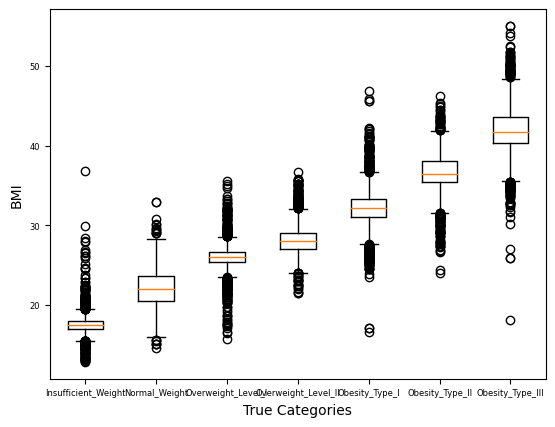

In [6]:
def get_BMI(w,h):
    return w/h**2

BMI = get_BMI(X['Weight'],X['Height'])
prep_box_plot(BMI,'BMI')
plot_it()

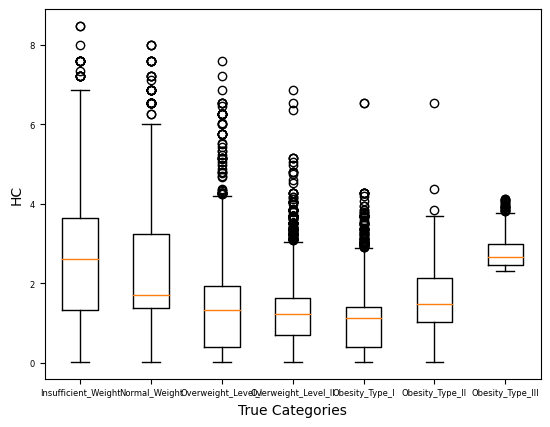

In [7]:
def get_HC(NCP,FCVC,CH2O,Age):
    return (NCP*FCVC)**2 / (CH2O**2 + Age)

HC = get_HC(X['NCP'],X['FCVC'],X['CH2O'],X['Age'])
prep_box_plot(HC,'HC')
plot_it()

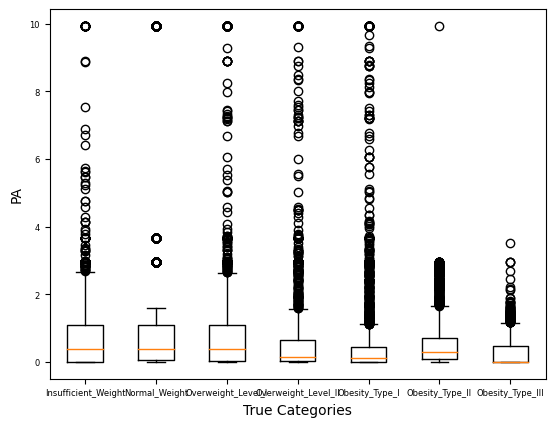

In [8]:
# Still not able to get value out of the combination FAF & TUE
PA = ((X['FAF'])**3/np.exp(X['TUE']+1)) # np.log(X['Age']) - 
prep_box_plot(PA,'PA')
plot_it()

In [9]:
# Add new features
test_data['BMI'] = get_BMI(test_data['Weight'], test_data['Height'])
train_data['BMI'] = get_BMI(train_data['Weight'], train_data['Height'])
features.append('BMI')

# get_HC(NCP,FCVC,CH2O,Age)
test_data['HC'] = get_HC(test_data['NCP'], test_data['FCVC'], test_data['CH2O'], test_data['Age'])
train_data['HC'] = get_HC(train_data['NCP'], train_data['FCVC'], train_data['CH2O'], train_data['Age'])
features.append('HC')

# Update train & test set
X = train_data[features]
X_predict = test_data[features]

# Training Models
First I will get (X_train, y_train), (X_cv, y_cv) and (X_test, y_test) from the train_data set. Cross-validation, cv, will be used to evaluate parameters in the different models. Test-data from train-data will be used to evaluate between models.

I will test RandomForestClassifier, XGBoost and a Nerual Network.

In [10]:
from sklearn.model_selection import train_test_split
# Get training sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train,y_train,test_size = 0.25,train_size = 0.75)

RFC = False
XGB = True

# (X_train,   y_train )   <-> (X_test,   y_test)
# (X_train_cv,y_train_cv) <-> (X_test_cv,y_testcv)


## XGBoost from Scikit-Learn
This was the second model used. A ML-model built on multiple decion trees, with the extra ability to promote features/choices that focus on examples that previous trees failed on.

In [11]:
if XGB:
    import xgboost as xgb
    from sklearn.metrics import accuracy_score, confusion_matrix
    n_trees = [100,150]
    n_depths = [i for i in range(15,25)]
    res = []
    for trees in n_trees:
        for depth in n_depths:
            model = xgb.XGBClassifier(objective="multi:softprob", n_estimators=trees, max_depth=depth, random_state=42)
            print(f"Train XGB with trees={trees} and max_depth={depth}")
            model.fit(X_train_cv,y_train_cv)
            yhat = model.predict(X_test_cv)
            accuracy = accuracy_score(y_test_cv, yhat)
            print(f"Accuracy: {accuracy}")
            print(confusion_matrix(y_test_cv, yhat))
            res.append({'accuracy':accuracy,'yhat':yhat,'trees':trees,'depth':depth})
    print("Done training")

Train XGB with trees=100 and max_depth=15
Accuracy: 0.9010115606936416
[[466  33   1   0   0   0   0]
 [ 32 537  33   8   0   0   0]
 [  3  45 367  49   7   0   0]
 [  0  11  51 402  40   3   0]
 [  0   0  14  44 477  11   3]
 [  0   0   0   3  17 663   1]
 [  0   0   1   0   1   0 829]]
Train XGB with trees=100 and max_depth=16
Accuracy: 0.9019749518304432
[[466  33   1   0   0   0   0]
 [ 36 538  29   7   0   0   0]
 [  3  45 365  51   7   0   0]
 [  0  11  53 402  38   3   0]
 [  0   0  11  43 480  12   3]
 [  0   0   0   3  15 665   1]
 [  0   0   1   0   1   0 829]]
Train XGB with trees=100 and max_depth=17
Accuracy: 0.9000481695568401
[[468  31   1   0   0   0   0]
 [ 36 534  32   8   0   0   0]
 [  3  46 359  56   7   0   0]
 [  0   8  54 403  39   3   0]
 [  0   0  11  44 479  12   3]
 [  0   0   0   2  16 665   1]
 [  0   0   1   0   1   0 829]]
Train XGB with trees=100 and max_depth=18
Accuracy: 0.9019749518304432
[[465  34   1   0   0   0   0]
 [ 35 543  24   8   0   0   0]


In [12]:
if XGB:
    depth = 0
    trees = 0
    accuracy = 0
    for r in res:
        if r['accuracy'] > accuracy:
            accuracy = r['accuracy']
            trees    = r['trees']
            depth    = r['depth']
    print(f"Best parameters found are trees: {trees} and max depth: {depth} with an accuracy of {accuracy:.4f}")

Best parameters found are trees: 150 and max depth: 16 with an accuracy of 0.9032


Train XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Accuraccy on internal test data with RandomForestClassifier: 0.8952312138728323


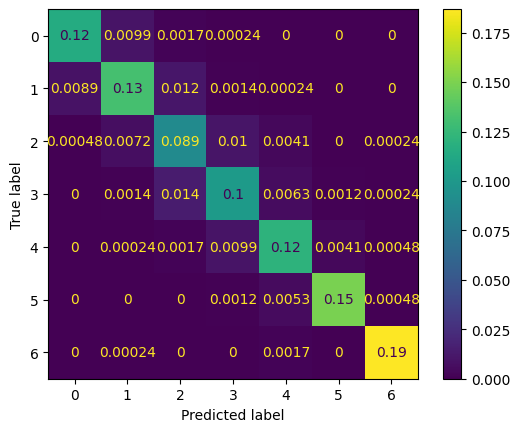

In [13]:
if XGB:
    from sklearn.metrics import ConfusionMatrixDisplay

    # Get accuracy of training on X_train
    model = xgb.XGBClassifier(objective="multi:softprob", n_estimators=trees, max_depth=depth, random_state=42)
    print(f"Train {model}")
    model.fit(X_train,y_train)
    yhat = model.predict(X_test)

    accuracy = accuracy_score(y_test, yhat)
    print(f"Accuraccy on internal test data with RandomForestClassifier: {accuracy}")

    ConfusionMatrixDisplay.from_predictions(yhat,y_test,normalize='all')

## RandomForestClassifier from Scikit-Learn
This was the first model used. A ML-model built on multiple decision trees. 

In [14]:
if RFC:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

    n_trees = [100,150]
    n_depths = [i for i in range(15,25)]
    res = []
    for trees in n_trees:
        for depth in n_depths:
            model = RandomForestClassifier(n_estimators=trees,max_depth=depth)
            print(f"Train {model}")
            model.fit(X_train_cv,y_train_cv)
            yhat = model.predict(X_test_cv)
            accuracy = accuracy_score(y_test_cv, yhat)
            res.append({'accuracy':accuracy,'yhat':yhat,'trees':trees,'depth':depth})
    print("Done training")

In [15]:
if RFC:
    depth = 0
    trees = 0
    accuracy = 0
    for r in res:
        if r['accuracy'] > accuracy:
            accuracy = r['accuracy']
            trees    = r['trees']
            depth    = r['depth']
    print(f"Best parameters found are trees: {trees} and max depth: {depth} with an accuracy of {accuracy:.4f}")

In [16]:
if RFC:
    from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

    # Get accuracy of training on X_train
    model = RandomForestClassifier(n_estimators=trees,max_depth=depth)
    print(f"Train {model}")
    model.fit(X_train,y_train)
    yhat = model.predict(X_test)

    accuracy = accuracy_score(y_test, yhat)
    print(f"Accuraccy on internal test data with RandomForestClassifier: {accuracy}")

    ConfusionMatrixDisplay.from_predictions(yhat,y_test,normalize='all')

### Train final model
The model will be re-trained with the full train data set. The result will be outputed and submitted.

In [17]:
if RFC:
    model = RandomForestClassifier(n_estimators=trees,max_depth=depth)
    print(f"Train {model}")
    model.fit(X,y)
    yhat = model.predict(X_predict)
    print(f"X_predict.shape: {X_predict.shape}, yhat.shape: {yhat.shape}")
    
if XGB:
    model = xgb.XGBClassifier(objective="multi:softprob", n_estimators=trees, max_depth=depth, random_state=42)
    print(f"Train {model}")
    model.fit(X,y)
    yhat = model.predict(X_predict)
    print(f"X_predict.shape: {X_predict.shape}, yhat.shape: {yhat.shape}")

Train XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
X_predict.shape: (13840, 28), yhat.shape: (13840,)


In [18]:
if RFC:
    # Prepare for output
    map_categories = np.vectorize(lambda x: categories[x])
    predictions = map_categories(yhat)
    print(predictions[:5])
    print(yhat[:5])
    print(f"predictions.shape: {predictions.shape}, test_data.id.shape: {test_data.id.shape}")
    output = pd.DataFrame({'id': test_data.id, 'NObeyesdad': predictions})
    print(output.head())
if XGB:
    # Prepare for output
    map_categories = np.vectorize(lambda x: categories[x])
    predictions = map_categories(yhat)
    print(predictions[:5])
    print(yhat[:5])
    print(f"predictions.shape: {predictions.shape}, test_data.id.shape: {test_data.id.shape}")
    output = pd.DataFrame({'id': test_data.id, 'NObeyesdad': predictions})
    print(output.head())

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III'
 'Obesity_Type_I' 'Obesity_Type_III']
[5 2 6 4 6]
predictions.shape: (13840,), test_data.id.shape: (13840,)
      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III


In [19]:
if RFC:
    #Save the result
    output.to_csv('submission_RFC.csv', index=False)
if XGB:
    #Save the result
    output.to_csv('submission_XGB.csv', index=False)